In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Project Phase 2\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(614, 13)

Here we have 614 rows & 13 columns in our Data set

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here are three types of data present in the dataset namely object, float64 & int64.

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


    Using the describe method we can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our dataset.

# Data Preprocessing and Visualization

In [11]:
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


In [12]:
df.drop(['Loan_ID'],axis=1,inplace=True)

As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.

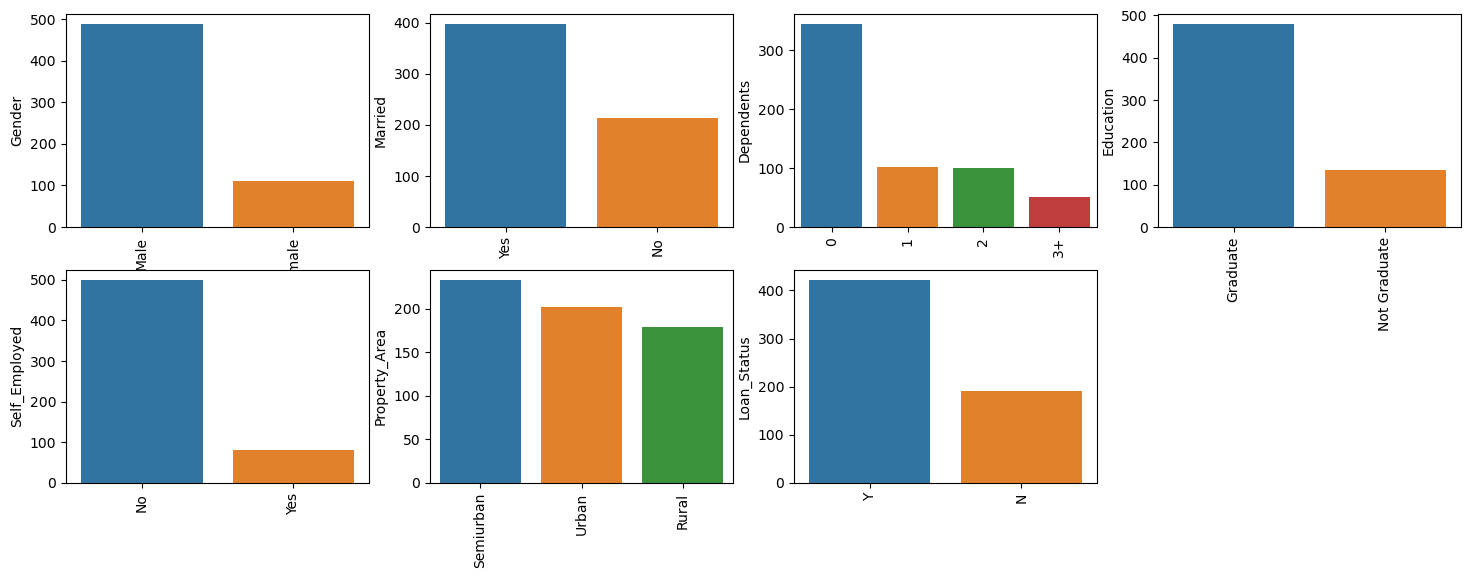

In [13]:
obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = df[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

In [14]:
from sklearn import preprocessing 

In [15]:
label_encoder = preprocessing.LabelEncoder() 
obj = (df.dtypes == 'object') 
for col in list(obj[obj].index): 
  df[col] = label_encoder.fit_transform(df[col])

Again check the object datatype columns. Let’s find out if there is still any left.

In [16]:
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

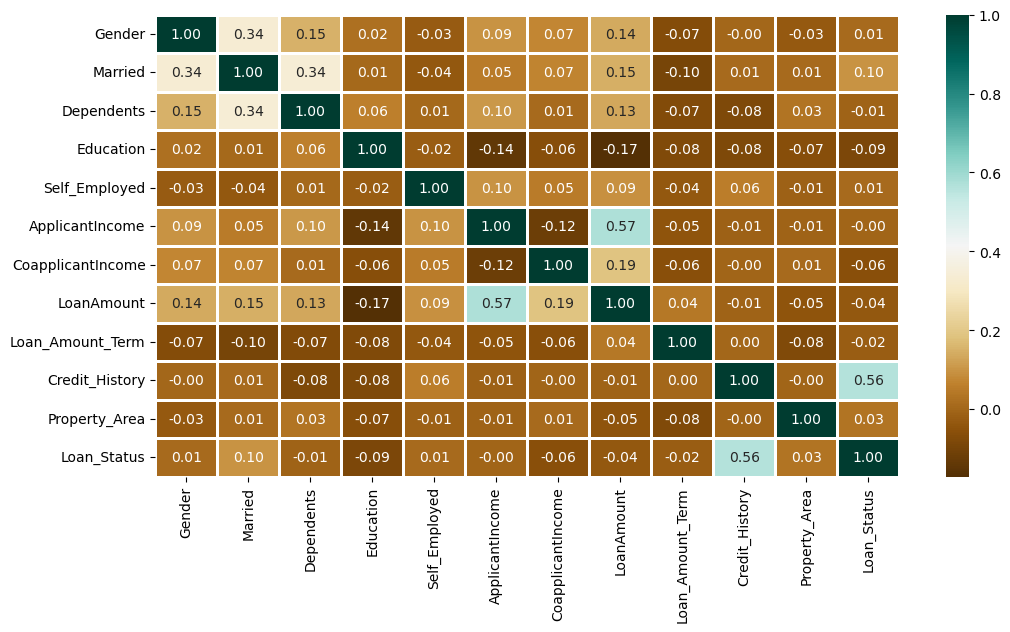

In [17]:
plt.figure(figsize=(12,6)) 
  
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)

The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

In [20]:
for col in df.columns: 
  df[col] = df[col].fillna(df[col].mean())  
    
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As there is no missing value then we must proceed to model training.

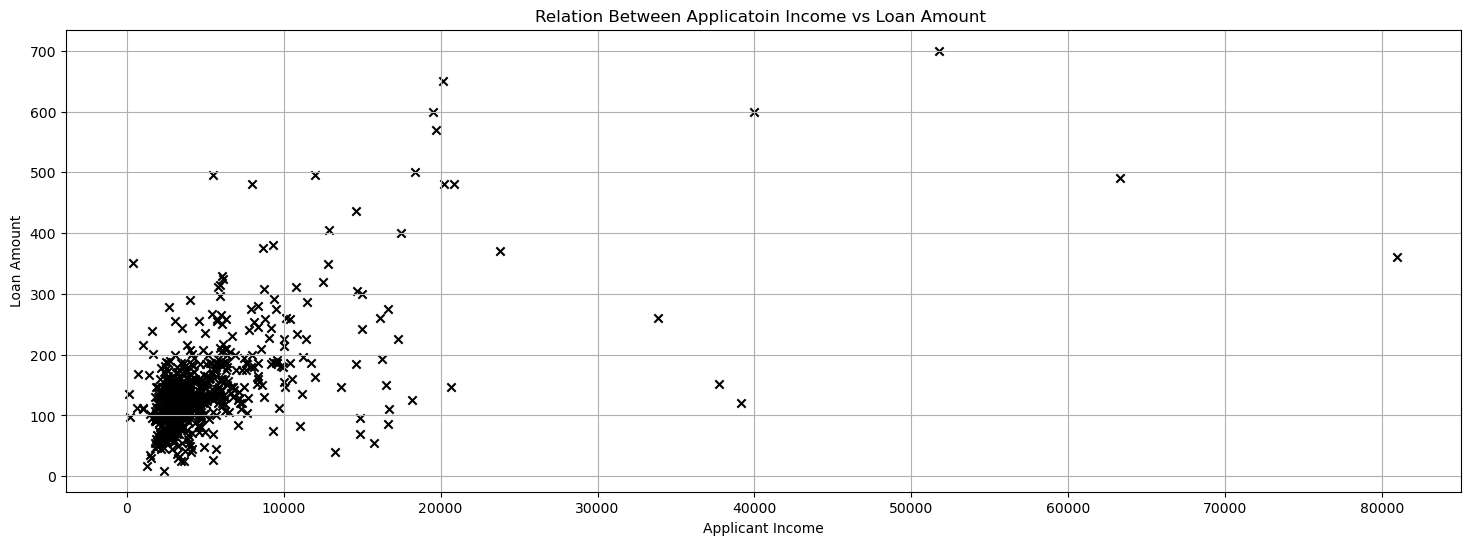

In [28]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

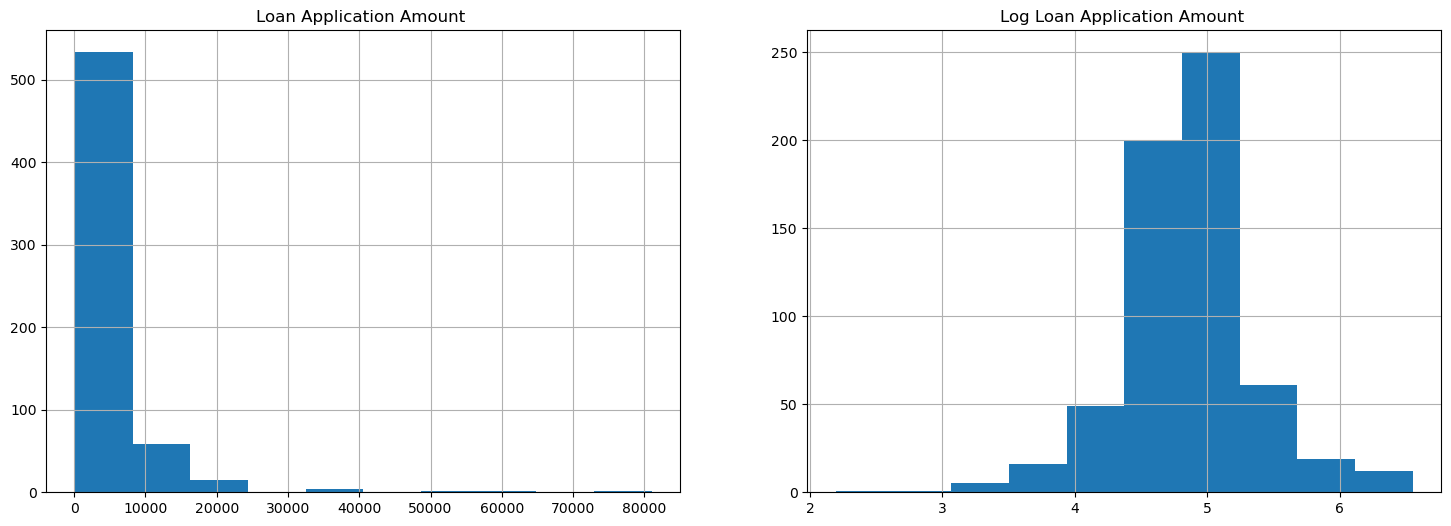

In [29]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


df['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(df['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

# Splitting Dataset 

In [22]:
from sklearn.model_selection import train_test_split 

In [23]:
X = df.drop(['Loan_Status'],axis=1) 
Y = df['Loan_Status'] 
X.shape,Y.shape 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.4, 
                                                    random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((368, 11), (246, 11), (368,), (246,))

# Model Training and Evaluation

To predict the accuracy we will use the accuracy score function from scikit-learn library.

In [24]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 

In [25]:
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7,criterion = 'entropy',random_state =7) 
svc = SVC() 
lc = LogisticRegression() 
   
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", 
          clf.__class__.__name__, 
          "=",100*metrics.accuracy_score(Y_train,  
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 97.01086956521739
Accuracy score of  KNeighborsClassifier = 77.17391304347827
Accuracy score of  SVC = 70.38043478260869
Accuracy score of  LogisticRegression = 82.88043478260869


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", 
          clf.__class__.__name__,"=", 
          100*metrics.accuracy_score(Y_test, 
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 76.42276422764228
Accuracy score of  KNeighborsClassifier = 62.19512195121951
Accuracy score of  SVC = 67.07317073170732
Accuracy score of  LogisticRegression = 78.86178861788618


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression is giving the best accuracy with an accuracy score of 78.8% for the testing dataset.